In [1]:
import numpy as np
import cv2
import PIL.Image as Image
import os
import matplotlib.pylab as plt
import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [4]:
IMAGE_SHAPE=(224,224)
classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))
])
classifier.trainable=False

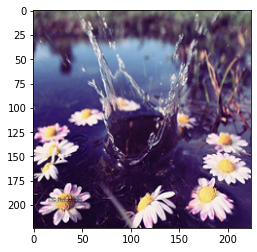

In [7]:
image=Image.open("/content/gdrive/MyDrive/Colab Notebooks/flower_photos/daisy/10172379554_b296050f82_n.jpg").resize(IMAGE_SHAPE)
plt.imshow(image)

In [8]:
flower=np.array(image)/255
flower=flower[np.newaxis, ...]

result=classifier.predict(flower)
Max_result=np.argmax(result)

image_lables=[]
with open("/content/gdrive/MyDrive/Colab Notebooks/flower_photos/LICENSE.txt","r") as f:
  image_labels=f.read().splitlines()
image_labels[Max_result]

'daisy/8932490012_cc08e690ba_n.jpg CC-BY by TANAKA Juuyoh (田中十洋) - https://www.flickr.com/photos/tanaka_juuyoh/8932490012/'

In [9]:
flower_folder=r"/content/gdrive/MyDrive/Colab Notebooks/flower_photos"
catagories=['daisy','dandelion','roses','sunflowers','tulips',]

In [11]:
data=[]
for Catagories in catagories:
  Folder=os.path.join(flower_folder,Catagories)
  label=catagories.index(Catagories)

  for img in os.listdir(Folder):
    image=os.path.join(Folder,img)
    image_arr=cv2.imread(image)
    image_arr=cv2.resize(image_arr,IMAGE_SHAPE)
    data.append([image_arr,label])

In [12]:
data

[[array([[[ 15,  42,  38],
          [ 15,  42,  38],
          [ 16,  43,  39],
          ...,
          [ 85, 106, 108],
          [ 85, 106, 108],
          [ 84, 105, 107]],
  
         [[ 15,  42,  38],
          [ 15,  42,  38],
          [ 16,  43,  39],
          ...,
          [ 85, 106, 108],
          [ 84, 105, 107],
          [ 83, 104, 106]],
  
         [[ 15,  42,  38],
          [ 15,  42,  38],
          [ 16,  43,  39],
          ...,
          [ 84, 105, 107],
          [ 83, 104, 106],
          [ 83, 104, 106]],
  
         ...,
  
         [[  5,  24,  21],
          [  5,  24,  21],
          [  5,  24,  21],
          ...,
          [  6,  29,  25],
          [  6,  29,  25],
          [  7,  30,  26]],
  
         [[  4,  23,  20],
          [  4,  23,  20],
          [  4,  23,  20],
          ...,
          [  6,  29,  25],
          [  6,  29,  25],
          [  6,  29,  25]],
  
         [[  4,  23,  20],
          [  4,  23,  20],
          [  4,  23,  20

In [13]:
import random
random.shuffle(data)
x=[]
y=[]
for feature,label in data :
  x.append(feature)
  y.append(label)

x=np.array(x)
y=np.array(y)

x=x/255
x

array([[[[0.62352941, 0.55294118, 0.50196078],
         [0.58039216, 0.52156863, 0.45098039],
         [0.58431373, 0.52156863, 0.46666667],
         ...,
         [0.04705882, 0.18039216, 0.11372549],
         [0.05098039, 0.18431373, 0.11764706],
         [0.04313725, 0.17647059, 0.10980392]],

        [[0.58039216, 0.50980392, 0.44705882],
         [0.60392157, 0.53333333, 0.48235294],
         [0.59215686, 0.53333333, 0.4745098 ],
         ...,
         [0.04705882, 0.18039216, 0.11372549],
         [0.05098039, 0.18431373, 0.11764706],
         [0.04313725, 0.17647059, 0.10980392]],

        [[0.65882353, 0.58039216, 0.53333333],
         [0.66666667, 0.59215686, 0.54901961],
         [0.63137255, 0.56078431, 0.50980392],
         ...,
         [0.04705882, 0.18039216, 0.11372549],
         [0.04705882, 0.18431373, 0.11764706],
         [0.04313725, 0.17647059, 0.10980392]],

        ...,

        [[0.00392157, 0.21568627, 0.1254902 ],
         [0.00392157, 0.21176471, 0.13333333]

In [14]:
x.shape

(3670, 224, 224, 3)

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

In [16]:
previous_model=hub.KerasLayer(
    "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4",
    input_shape=IMAGE_SHAPE+(3,),
    trainable=False
)

In [17]:
number_of_flower=5
model = tf.keras.Sequential([
                 previous_model,
                 tf.keras.layers.Dense(number_of_flower)          
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_1 (KerasLayer)   (None, 1280)              2257984   
_________________________________________________________________
dense (Dense)                (None, 5)                 6405      
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [18]:
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['acc']
)
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
86/86 [==============================] - 80s 879ms/step - loss: 0.7892 - acc: 0.7078
Epoch 2/5
86/86 [==============================] - 76s 883ms/step - loss: 0.4183 - acc: 0.8496
Epoch 3/5
86/86 [==============================] - 75s 870ms/step - loss: 0.3245 - acc: 0.8899
Epoch 4/5
86/86 [==============================] - 75s 871ms/step - loss: 0.2766 - acc: 0.9088
Epoch 5/5
86/86 [==============================] - 75s 870ms/step - loss: 0.2298 - acc: 0.9313


In [19]:
model.evaluate(x_test,y_test)

29/29 [==============================] - 28s 931ms/step - loss: 0.4067 - acc: 0.8725


[0.4067225754261017, 0.8725489974021912]